### Lectura del dataset como dataframe

In [1]:
### Lectura del dataset como dataframe

import pandas as pd

ruta = 'bbc_data.csv'
# Leer un archivo CSV (si ya lo tienes subido)
df = pd.read_csv(ruta)

# Ver las primeras filas
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


## 1. TEXT NER Resumen

### Resume las noticias ordenando las frases de manera que las más importantes aparecen primero. La importancia se mide mirando el número de sustantivos

In [3]:
### Resume las noticias ordenando las frases de manera que las más importantes aparecen primero. La importancia se mide mirando el número de sustantivos

import nltk
import pandas as pd
import shutil


# Descargamos los recursos necesarios
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker_tab')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Leemos el CSV con pandas
df = pd.read_csv(ruta, encoding='ISO-8859-1') ## o latin-1 -- ISO-8859-1

# Asumimos que la columna de texto se llama 'data'
text_column = 'data'

# Procesamos solo las primeras 10 filas
for index, row in df.head(2).iterrows():
    news_content = row[text_column]  # El contenido de la noticia
    print(f"\n=== Procesando noticia {index+1} ===")

    results = []
    for sent_no, sentence in enumerate(nltk.sent_tokenize(news_content)):
        no_of_tokens = len(nltk.word_tokenize(sentence))
        tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
        no_of_nouns = len([word for word, pos in tagged if pos in ["NN", "NNP"]])
        ners = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence)), binary=False)
        no_of_ners = len(ners)
        score = ((no_of_ners + no_of_nouns) / float(no_of_tokens)) if no_of_tokens > 0 else 0
        results.append((sent_no, no_of_tokens, no_of_ners, no_of_nouns, score, sentence))
        print((sent_no, no_of_tokens, no_of_ners, no_of_nouns, score, sentence))

    print("\nResumen:")
    for sent in sorted(results, key=lambda x: x[4], reverse=True):
        print(sent[5])

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Usuario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-


=== Procesando noticia 1 ===
(0, 28, 28, 5, 1.1785714285714286, 'Musicians to tackle US red tape  Musicians groups are to tackle US visa regulations which are blamed for hindering British acts chances of succeeding across the Atlantic.')
(1, 23, 23, 4, 1.173913043478261, 'A singer hoping to perform in the US can expect to pay $1,300 (xc2xa3680) simply for obtaining a visa.')
(2, 21, 20, 4, 1.1428571428571428, 'Groups including the Musicians Union are calling for an end to the "raw deal" faced by British performers.')
(3, 18, 18, 3, 1.1666666666666667, 'US acts are not faced with comparable expense and bureaucracy when visiting the UK for promotional purposes.')
(4, 19, 18, 4, 1.1578947368421053, 'Nigel McCune from the Musicians Union said British musicians are "disadvantaged" compared to their US counterparts.')
(5, 31, 31, 4, 1.1290322580645162, 'A sponsor has to make a petition on their behalf, which is a form amounting to nearly 30 pages, while musicians face tougher regulations th

## 2. TEXT WORDNET

### Se ha considerado aprovechar la oportunidad de tener hiperónimos y hipónimos para sacar una idea y análisis general de nuestro conjunto de datos. Para cada palabra se escoge su hipónimo de segundo nivel de manera que sea algo muchos más global. Se hace un recuento de los hipónimos que más aparecen y se muestran en pantalla, representando los temas o campos que más aparecen. 

In [4]:
### Se ha considerado aprovechar la oportunidad de tener hiperónimos y hipónimos para sacar una idea y análisis general de nuestro conjunto de datos. Para cada palabra se escoge su hipónimo de segundo nivel de manera que sea algo muchos más global. Se hace un recuento de los hipónimos que más aparecen y se muestran en pantalla, representando los temas o campos que más aparecen. 

import nltk
assert(nltk.download('wordnet'))  # Make sure we have the wordnet data.
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:

text_column = 'data'

# Guardaremos resultados en un diccionario para luego usarlos
important_sentences = {}

for index, row in df.iterrows():
    news_content = row[text_column]

    # Almacenamos todas las frases de la noticia
    sentences = []
    for sentence in nltk.sent_tokenize(news_content):
        sentences.append(sentence)

    # Guardamos todas las frases por noticia
    important_sentences[f"news_{index+1}"] = sentences



In [6]:
from collections import Counter

# Lista para guardar todos los hiperónimos de segundo nivel
second_level_hypernyms = []

for news_id, sentences in important_sentences.items():
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            synsets = wn.synsets(word)
            if len(synsets) >= 2:
                s = synsets[0]  # Primer synset
                # Vamos al hiperónimo de primer nivel
                if s.hypernyms():
                    first_hypernym = s.hypernyms()[0]
                    # Luego al hiperónimo del hiperónimo (segundo nivel)
                    if first_hypernym.hypernyms():
                        second_hypernym = first_hypernym.hypernyms()[0]
                        hypernym_name = second_hypernym.name()
                        # Eliminar el sufijo ".n.01" del nombre del hiperónimo
                        clean_hypernym_name = hypernym_name.split('.')[0]
                        second_level_hypernyms.append(clean_hypernym_name)

# Contar frecuencia
hypernym_counts = Counter(second_level_hypernyms)

# Mostrar los 30 más frecuentes
print("\n=== Top 30 Hiperónimos de Segundo Nivel Más Frecuentes ===\n")
for hypernym, count in hypernym_counts.most_common(30):
    print(f"{hypernym}: {count} veces")


=== Top 30 Hiperónimos de Segundo Nivel Más Frecuentes ===

unit_of_measurement: 22582 veces
linear_unit: 18407 veces
group: 13428 veces
integer: 10809 veces
act: 10315 veces
person: 8340 veces
organism: 8249 veces
chemical_element: 6669 veces
gas: 5989 veces
substance: 5514 veces
change: 5436 veces
angle: 4956 veces
fundamental_quantity: 4709 veces
ability: 4647 veces
organization: 4633 veces
attribute: 4628 veces
activity: 4441 veces
abstraction: 4353 veces
artifact: 4327 veces
measure: 4022 veces
instrumentality: 3828 veces
communication: 3816 veces
event: 3689 veces
state: 3593 veces
time_period: 3018 veces
message: 2958 veces
happening: 2904 veces
social_group: 2830 veces
concept: 2800 veces
location: 2776 veces


## 3. WordCloud

### Se han realizado distintas WordClouds tanto para los hipónimos más repetidos, como para todas las noticias en general, y también separando por tipo de noticia. Todas ellas utilizando la frecuencia como métrica

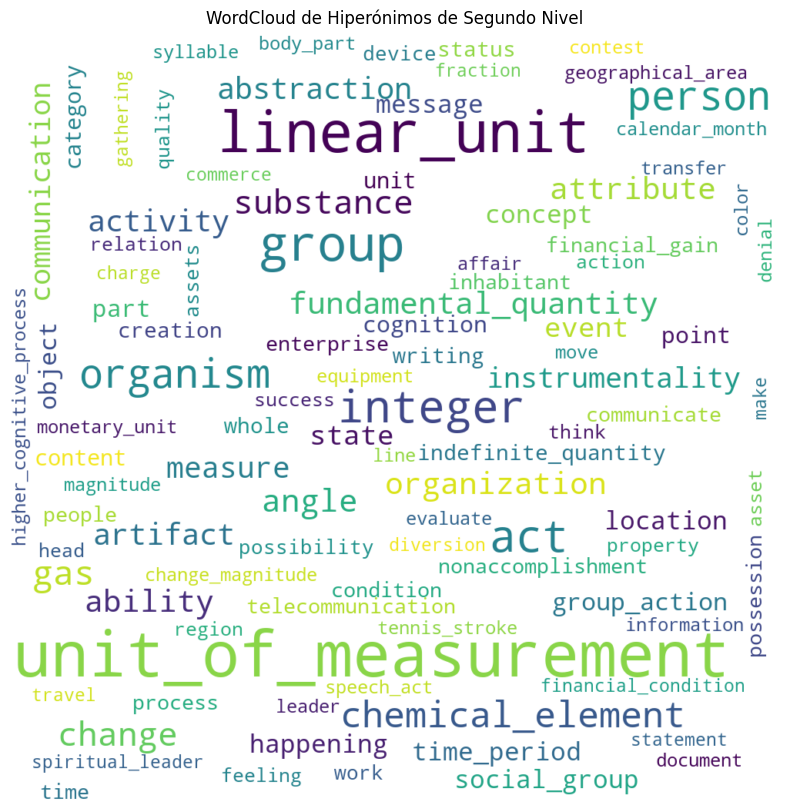

In [7]:
### Se han realizado distintas WordClouds tanto para los hipónimos más repetidos, como para todas las noticias en general, y también separando por tipo de noticia. Todas ellas utilizando la frecuencia como métrica

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generamos el WordCloud basado en la frecuencia de los hiperónimos de segundo nivel
wc = WordCloud(
    width=1000,
    height=1000,
    max_words=100,
    background_color='white'
).generate_from_frequencies(hypernym_counts)

# Mostramos el WordCloud
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud de Hiperónimos de Segundo Nivel")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


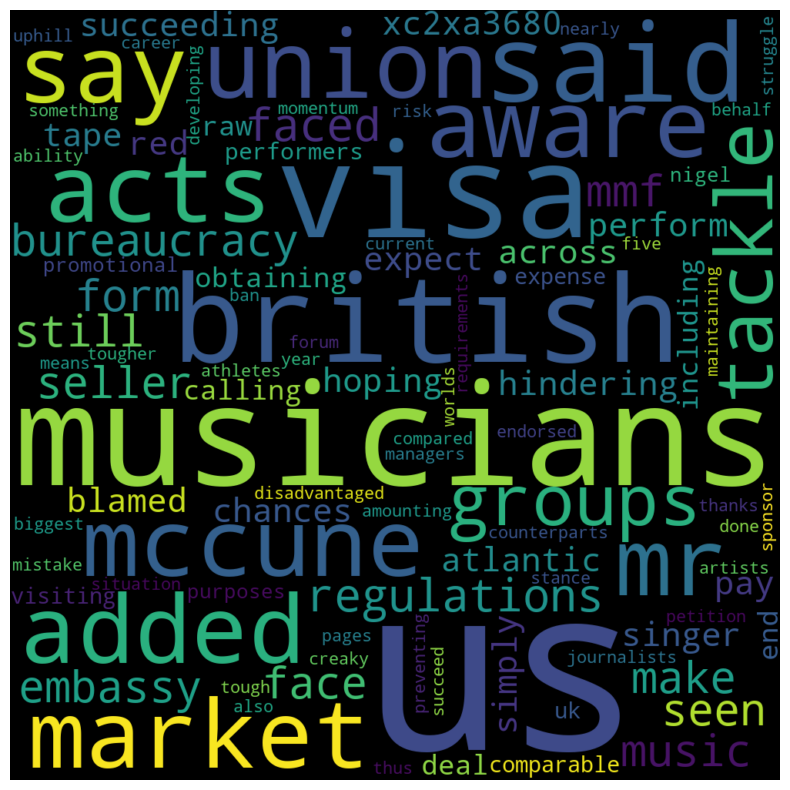

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords

# Descargar recursos necesarios
nltk.download('stopwords')

# Tomamos el contenido de la primera noticia
first_news = important_sentences['news_1']  # Aquí se toma la primera noticia, ajusta el índice según corresponda

# Unimos todas las frases de la primera noticia en un solo texto
news_content = ' '.join(first_news)

# Mostrar la primera noticia
#print("\n=== Primera Noticia ===")
#print(news_content)

# Tokenizamos el texto, eliminando puntuaciones y stopwords
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens_sin_puntuacion = tokenizer.tokenize(news_content)

# Filtramos las palabras eliminando las stopwords
stop_words = set(stopwords.words('spanish'))  # Stopwords en español
stop_words.update(stopwords.words('english'))  # Stopwords en inglés

tokens = [i for i in tokens_sin_puntuacion if (len(i) > 1) and i.lower() not in stop_words]

# Generamos la wordcloud
wc = WordCloud(
    width=1000,
    height=1000,
    stopwords=stop_words,  # Usamos nuestras stopwords personalizadas
    max_words=100,
    collocations=False
).generate(' '.join(tokens).lower())

# Mostramos la wordcloud
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


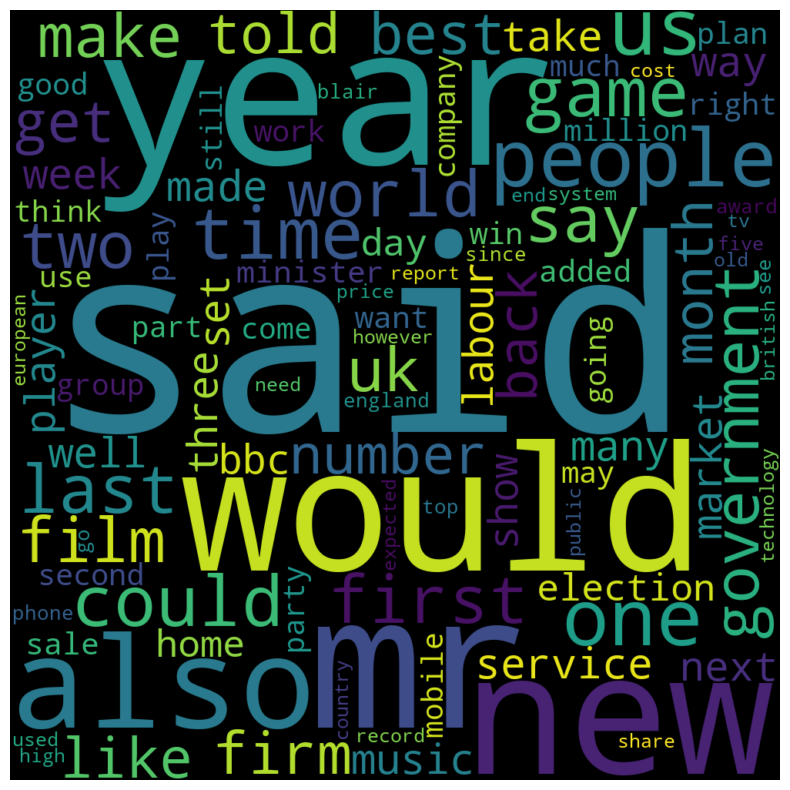

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords

# Descargar recursos necesarios
nltk.download('stopwords')

# Unimos todas las frases de las noticias en un solo texto
all_news_content = ' '.join([' '.join(sentences) for sentences in important_sentences.values()])

# Tokenizamos el texto, eliminando puntuaciones y stopwords
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens_sin_puntuacion = tokenizer.tokenize(all_news_content)

# Filtramos las palabras eliminando las stopwords
stop_words = set(stopwords.words('spanish'))  # Stopwords en español
stop_words.update(stopwords.words('english'))  # Stopwords en inglés

tokens = [i for i in tokens_sin_puntuacion if (len(i) > 1) and i.lower() not in stop_words]

# Generamos la wordcloud
wc = WordCloud(
    width=1000,
    height=1000,
    stopwords=stop_words,  # Usamos nuestras stopwords personalizadas
    max_words=100,
    collocations=False
).generate(' '.join(tokens).lower())

# Mostramos la wordcloud
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



=== Generando WordCloud para la categoría: entertainment ===


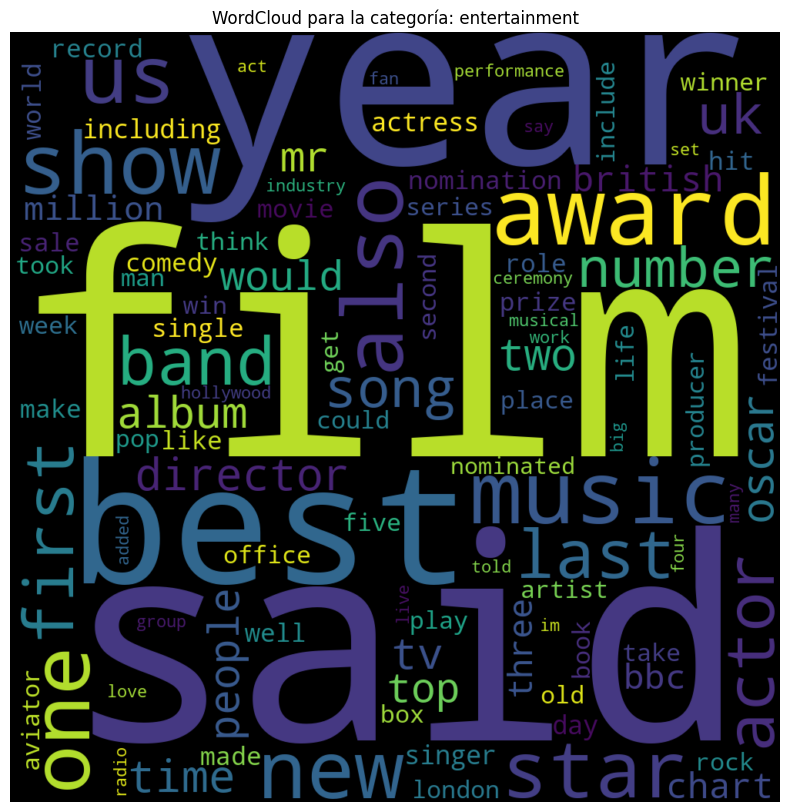


=== Generando WordCloud para la categoría: business ===


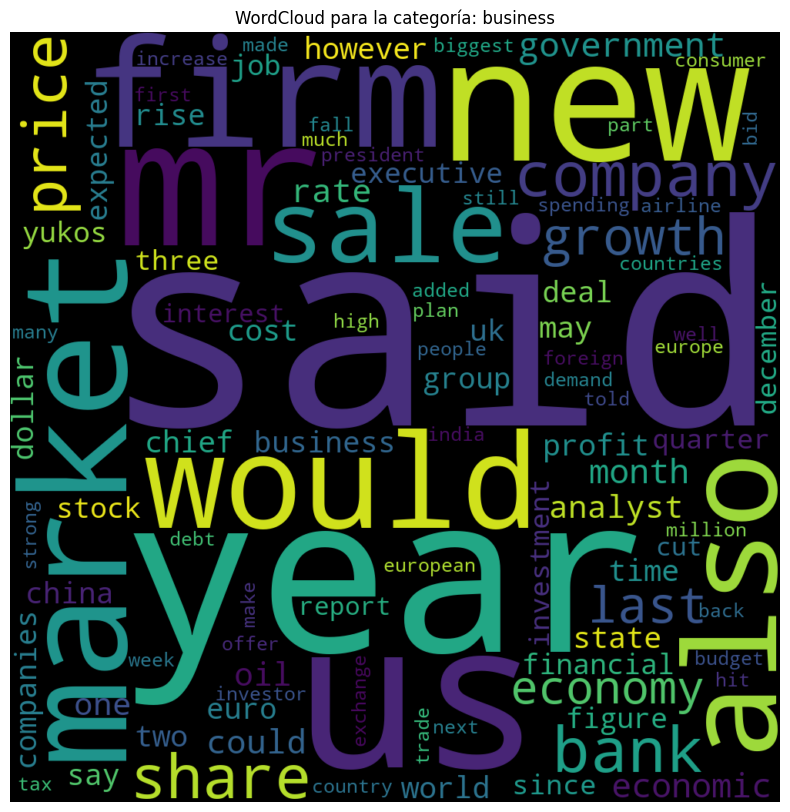


=== Generando WordCloud para la categoría: sport ===


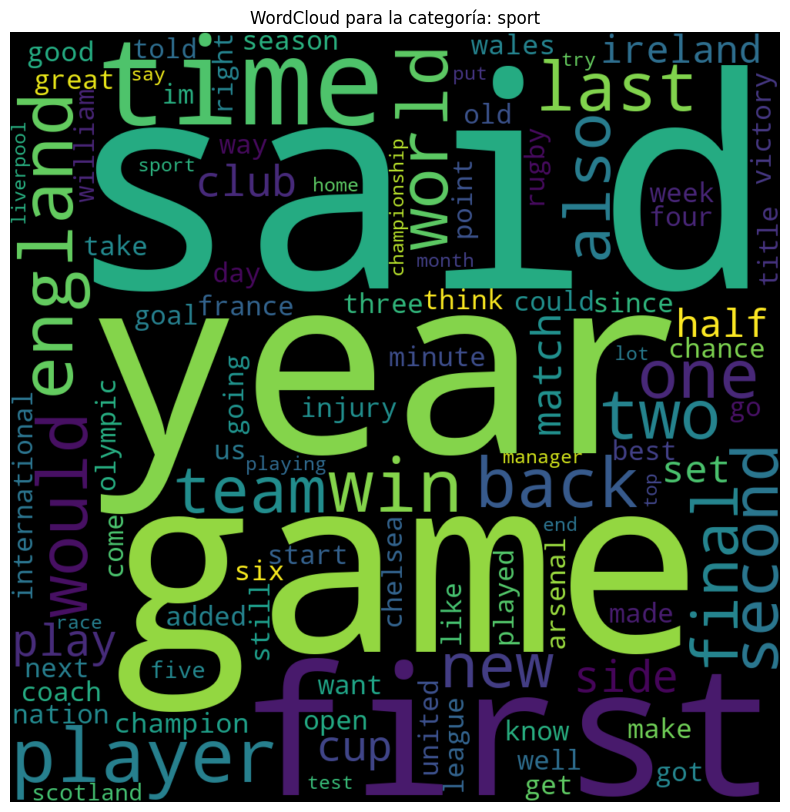


=== Generando WordCloud para la categoría: politics ===


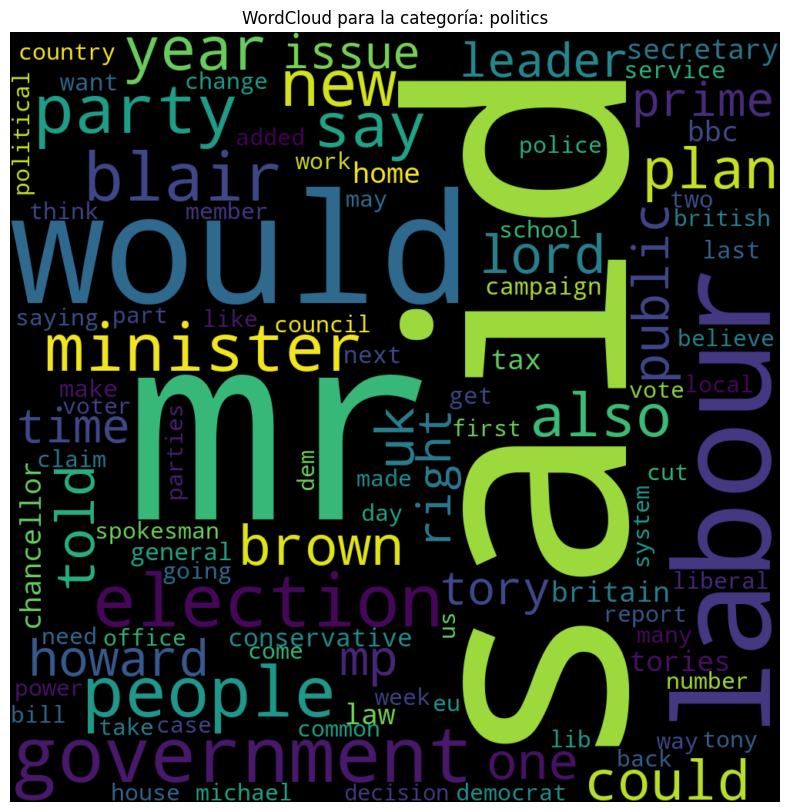


=== Generando WordCloud para la categoría: tech ===


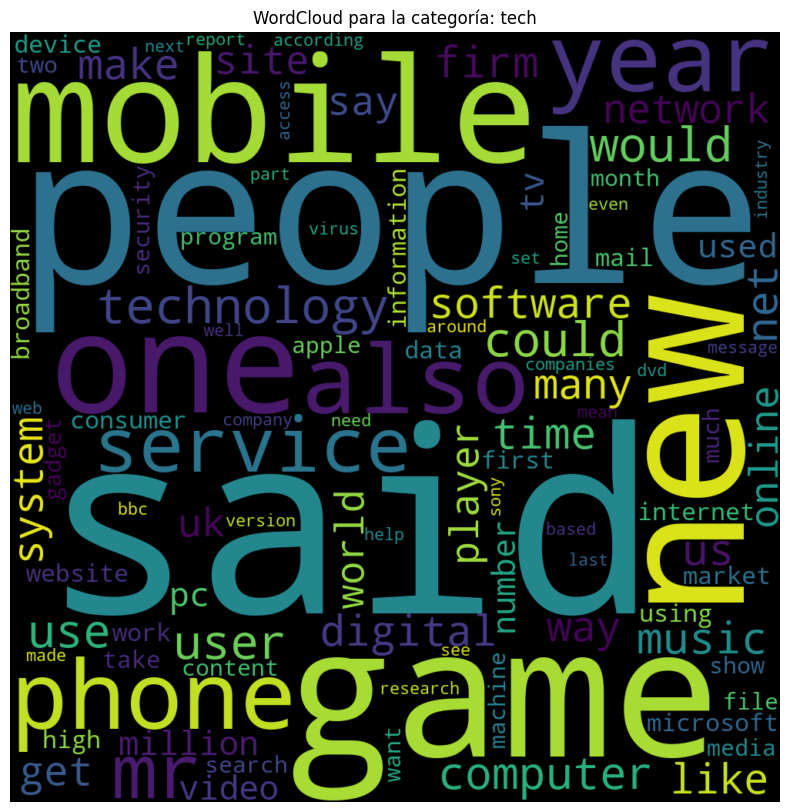

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Descargar recursos necesarios
nltk.download('stopwords')

# Asumiendo que la columna 'category' está en la segunda posición (índice 1)
# Asegúrate de tener el nombre correcto de la columna
category_column = 'labels'

# Filtramos y generamos una WordCloud por cada categoría
stop_words = set(stopwords.words('spanish'))  # Stopwords en español
stop_words.update(stopwords.words('english'))  # Stopwords en inglés

# Recorremos el DataFrame y generamos la WordCloud para cada categoría
for category in df[category_column].unique():
    print(f"\n=== Generando WordCloud para la categoría: {category} ===")

    # Filtramos las noticias de esa categoría
    category_news = df[df[category_column] == category]

    # Unimos todas las frases de las noticias de esa categoría en un solo texto
    category_content = ' '.join(category_news[text_column])

    # Tokenizamos el texto, eliminando puntuaciones y stopwords
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens_sin_puntuacion = tokenizer.tokenize(category_content)

    tokens = [i for i in tokens_sin_puntuacion if (len(i) > 1) and i.lower() not in stop_words]

    # Generamos la WordCloud
    wc = WordCloud(
        width=1000,
        height=1000,
        stopwords=stop_words,  # Usamos nuestras stopwords personalizadas
        max_words=100,
        collocations=False
    ).generate(' '.join(tokens).lower())

    # Mostramos la WordCloud para esa categoría
    plt.figure(figsize=[10,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud para la categoría: {category}")
    plt.show()


## 4. TFIDF

### Se realiza TF-IDF para obtener las palabras más importantes por categoría de noticia. 

In [17]:
### Se realiza TF-IDF para obtener las palabras más importantes por categoría de noticia. 

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


text_column = 'data'  # Cambia esto al nombre correcto de la columna de texto
category_column = 'labels'  # Cambia esto al nombre correcto de la columna de categorías

# Transformación en TF-IDF
corpus = df[text_column].tolist()  # El contenido de las noticias
tfidf = TfidfVectorizer(norm='l2', use_idf=True, max_df=20, smooth_idf=False, stop_words='english')
tfidf_matrix = tfidf.fit_transform(corpus)

# Muestra las palabras más importantes por categoría
for category, data in df.groupby(category_column):
    feat = np.sum(tfidf.transform(data[text_column]).toarray(), axis=0)
    sort_idx = np.argsort(feat.flatten())[::-1]  # Ordenar en orden descendente
    fav_words = [tfidf.get_feature_names_out()[idx] for idx in sort_idx.tolist()[:10]]  # Las 10 palabras más frecuentes
    print(f"\n{category}'s Fav words:")
    for word in fav_words:
        print('\t' + word)
    print()


business's Fav words:
	gazprom
	lse
	gm
	ebbers
	yugansk
	rosneft
	boerse
	crude
	fiat
	glazer


entertainment's Fav words:
	foxx
	dicaprio
	swank
	u2
	staunton
	soul
	fockers
	bafta
	rap
	takings


politics's Fav words:
	ukip
	kilroy
	prescott
	hunting
	referendum
	silk
	g8
	jewish
	detainees
	ethnic


sport's Fav words:
	mourinho
	kenteris
	iaaf
	federer
	gerrard
	wenger
	thanou
	benitez
	davenport
	marathon


tech's Fav words:
	spyware
	ds
	3g
	psp
	mac
	blogs
	blog
	wi
	domain
	browser

